# Intro
 
The datasets includes:

- Participants: participant number

- Four columns for the second-order strengths factors previously extracted via PCA:
    - Openness
    - Restraint
    - Transcendence
    - Interpersonal
    
- The three dependent measures: 
    - DASS21 (Depression Anxiety and Stress Scale) 
    - GHQ12 (General Health Questionnaire) : the higher the score, the worst the mental health
    - SEC (Self-efficacy for Covid-19)
- Six demographic variables added in the analysis:
    - Age
    - Gender
    - Work (representing the perceived work change subsequent to lockdown)
    - Student (being a student or not)
    - Day (how many days passed when the participant responded since the day the survey was opened)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
plt.style.use('default') # to plot white graphs despite black background
import seaborn as sns
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})
#sns.set_style('whitegrid')

# Writing the class PCA_from_scratch

In [2]:
class PCA_from_scratch:
    
    def __init__(self, k_components):
        # number of principal components to be returned
        self.k_components = k_components
        # principal directions are eigenvectors of the covariance matrix
        self.principal_directions = None
        # mean to be subtracted from X in order to center the problem and express Cov(X) = (1/n)*Xt @ X
        self.mean = None
        # Proportion of explained variance associated with every principal component
        self.explained_variance_ratio = None
        # Variance associated to every principal component
        self.variance_along_principal_direction = None
    
    def fit(self, X):
        # Factors are in cols, so I do the mean column wise
        self.mean = np.mean(X, axis = 0)
        X = X - self.mean
        
        # rowvar = False because in X I want observations on rows and factors on cols
        covariance_matrix = np.cov(X, rowvar = False)
        
        # eigenvalues and eigenvectors aren't necessary ordered
        # eigenvectors are column vectors
        eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
        # Now I sort eigenvalues and eigenvectors from the biggest --> argsort returns the indices that sort an array
        idx_eigenvalues_ordered = np.argsort(eigenvalues)[::-1] # with -1 I read from the end of the array
        eigenvalues_ordered = eigenvalues[idx_eigenvalues_ordered]
        eigenvectors_ordered = eigenvectors.T[idx_eigenvalues_ordered] # eigenvectors_ordered are on rows now
        
        self.explained_variance_ratio = eigenvalues_ordered / np.sum(eigenvalues_ordered)
        
        # If I want the first k-PCs, I have to consider only the first k-principal_directions (aka eigenvectors of covariance)
        self.principal_directions = eigenvectors_ordered[0:self.k_components,:]
        
        # If I want the explained variance ratio for first k-PCs, I have to consider only the first k-principal_directions
        self.explained_variance_ratio = self.explained_variance_ratio[0:self.k_components]
        
        # If I want the vaiance of data along the first k principal directions, I have to consider only the first k-eigenvalues
        self.variance_along_principal_direction = eigenvalues_ordered[0:self.k_components]

        
    def transform(self, X):
        X = X - self.mean
        principal_components = X @ self.principal_directions.T
        return(principal_components)

# Importing the dataframe

As I wrote in the introduction, the original table contained 4 sintetic factors already extracted from the original ones. So I delete them because they shouldn't influence the analysis. At the end of the PCA, I expect to find similar conclusions concerning the extrapolation and interpretation of the new factors.

In [3]:
df = pd.read_excel(r'C:\Users\peria\Desktop\GitHub\PCA\PCA_Covid_Psyco_Survey.xlsx', index_col = 0)

# Preprocessing of features
df.drop(columns = ['Day', 'DASS_21', 'Openness', 'Restraint', 'Transcendence', 'Interpersonal'], inplace = True)
df.dropna(inplace = True)
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})
df['Student'] = df['Student'].map({'Other': 0, 'Student': 1})

df.head()

,GHQ_12,SEC,Age,Gender,Work,Student,Sons,Appreciation_of_beauty,Bravery,Creativity,...,Perspective,Prudence,Self_regulation,Social_intelligence,Spirituality,Teamwork,Zest,DASS_anxiety,DASS_depression,DASS_stress
Participant,,,,,,,,,,,,,,,,,,,,,
1,24,11,26,0,5,1,0,19,17,17,...,13,18,13,16,15,22,20,0,7,8
2,15,20,25,1,1,0,0,18,16,16,...,18,15,20,15,17,15,18,4,5,9
3,7,20,26,1,1,0,0,15,16,16,...,19,17,22,17,11,12,15,0,0,0
4,18,18,25,0,6,0,0,22,15,22,...,19,24,15,21,12,11,19,1,4,10
5,19,14,49,0,5,0,1,21,18,25,...,20,18,24,15,21,18,21,14,8,15


In [4]:
# Understanding variable tipology
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 943 entries, 1 to 944
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   GHQ_12                  943 non-null    int64
 1   SEC                     943 non-null    int64
 2   Age                     943 non-null    int64
 3   Gender                  943 non-null    int64
 4   Work                    943 non-null    int64
 5   Student                 943 non-null    int64
 6   Sons                    943 non-null    int64
 7   Appreciation_of_beauty  943 non-null    int64
 8   Bravery                 943 non-null    int64
 9   Creativity              943 non-null    int64
 10  Curiosity               943 non-null    int64
 11  Fairness                943 non-null    int64
 12  Forgiveness             943 non-null    int64
 13  Gratitude               943 non-null    int64
 14  Honesty                 943 non-null    int64
 15  Hope                   

# Plotting correlation of variables

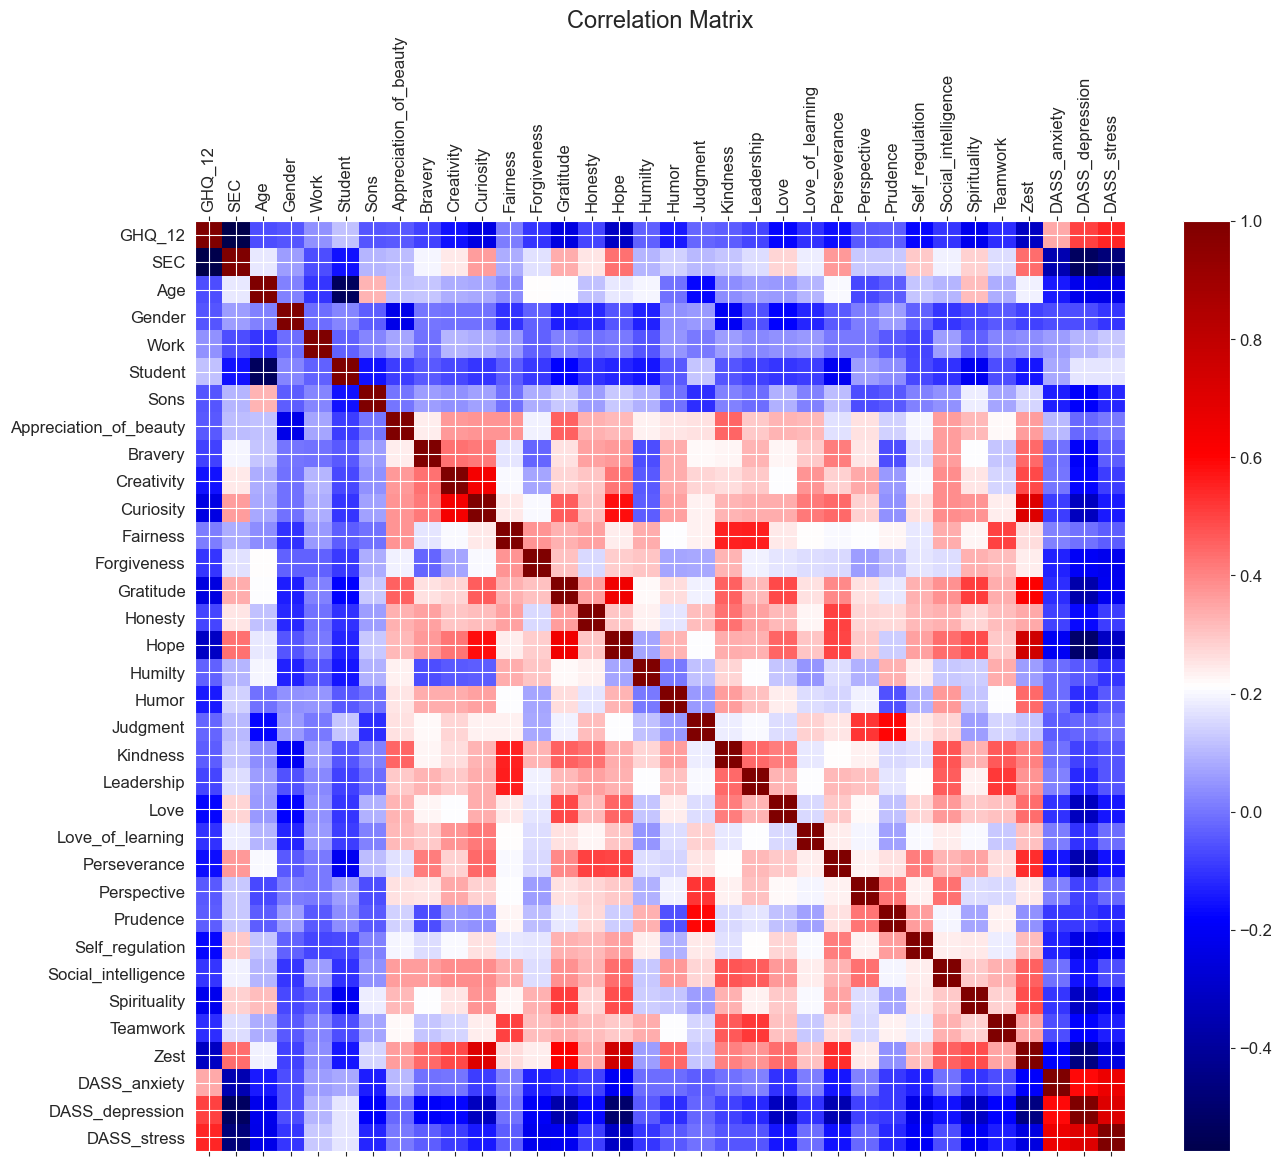

In [5]:
fig = plt.figure(figsize=(15, 12))
plt.matshow(df.corr(), fignum = fig.number, cmap='seismic')
plt.xticks(range(df.shape[1]), df.columns, fontsize = 12, rotation = 90)
plt.yticks(range(df.shape[1]), df.columns, fontsize = 12)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=12)
plt.title('Correlation Matrix', fontsize = 17)
plt.show()

# Scaling the features

In [6]:
import sklearn
from sklearn.preprocessing import StandardScaler

cols = df.columns

scaler = StandardScaler()
scaler.fit(df)
scaled_data = scaler.transform(df)
df = pd.DataFrame(scaled_data, columns = cols)

print('Now the dataframe is standardized --> mean 0 and std_dev 1')
df.head()

Now the dataframe is standardized --> mean 0 and std_dev 1


,GHQ_12,SEC,Age,Gender,Work,Student,Sons,Appreciation_of_beauty,Bravery,Creativity,...,Perspective,Prudence,Self_regulation,Social_intelligence,Spirituality,Teamwork,Zest,DASS_anxiety,DASS_depression,DASS_stress
0,1.425099,-1.016552,-0.775885,-0.585922,0.842172,1.921339,-0.735425,-0.356575,-0.407557,-0.368502,...,-1.485229,0.090955,-1.069667,-0.974808,-0.071229,1.367322,0.773433,-0.871627,0.416411,0.217858
1,-0.411623,1.241359,-0.844870,1.706711,-1.751030,-0.520470,-0.735425,-0.703583,-0.721036,-0.661997,...,0.079655,-0.821500,0.921554,-1.345620,0.417270,-1.230000,0.208485,0.326979,-0.030573,0.447915
2,-2.044266,1.241359,-0.775885,1.706711,-1.751030,-0.520470,-0.735425,-1.744607,-0.721036,-0.661997,...,0.392632,-0.213197,1.490474,-0.603995,-1.048227,-2.343138,-0.638936,-0.871627,-1.148034,-1.622593
3,0.200618,0.739601,-0.844870,-0.585922,1.490473,-0.520470,-0.735425,0.684448,-1.034516,1.098971,...,0.392632,1.915867,-0.500746,0.879254,-0.803977,-2.714183,0.490959,-0.571975,-0.254065,0.677971
4,0.404698,-0.263915,0.810780,-0.585922,0.842172,-0.520470,1.359758,0.337440,-0.094077,1.979455,...,0.705608,0.090955,2.059395,-1.345620,1.394269,-0.116862,1.055907,3.323495,0.639903,1.828253


# Calculate the PCs using the class PCA from scratch

In [7]:
from PCA_from_scratch import PCA_from_scratch
k = 10
# Create object
PCA_from_scratch = PCA_from_scratch(k_components = k)
# Fit method
PCA_from_scratch.fit(df.values)
# Transform method
PCs = PCA_from_scratch.transform(df.values)
df_PCA_from_scratch = pd.DataFrame(np.real(PCs), columns = ['PC' + str(j) for j in range(1, k+1)])

print('Principal Components PCs:')
df_PCA_from_scratch

Principal Components PCs:


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-1.163304,1.279722,0.925323,0.631546,2.291571,0.951877,0.559771,-0.272140,0.385804,1.505234
1,-2.435297,-1.840357,-0.499676,-0.282676,0.158767,0.281714,0.593521,2.287206,0.606362,0.137090
2,-2.287108,-4.214146,-0.897345,-3.222271,0.252322,0.293509,0.245902,1.337143,0.174208,-1.830204
3,0.829387,0.156663,-2.791356,-2.747720,-2.212163,2.770535,1.008097,-2.038684,-0.084765,0.006440
4,1.563233,1.101838,-2.412385,0.507003,-4.837004,2.244497,1.045260,0.319083,1.849115,1.448717
...,...,...,...,...,...,...,...,...,...,...
938,2.784894,2.961161,-0.974452,1.406457,-0.615975,-0.564282,-0.321548,1.565419,2.210830,-0.993839
939,1.001226,-0.423181,0.822430,3.513727,1.077906,-1.149154,-0.876739,0.472385,-1.220856,-0.671781
940,6.258854,0.213705,-2.978588,-0.466555,0.483390,-0.378884,1.358176,0.316549,-0.060431,0.465385
941,-3.414328,-2.157957,1.740978,1.710949,-0.074789,2.022236,-2.234071,-1.349389,1.763856,-0.089213


# Extract the first k-principal directions

In [8]:
print('The principal directions directly from the class PCA_from_scratch')
# Remember that the principal direction (aka eigenvectors are the rows of this matrix)
PCA_from_scratch.principal_directions

The principal directions directly from the class PCA_from_scratch


array([[-1.23878442e-01,  1.82025099e-01,  8.85647685e-02,
        -3.66608611e-02,  6.95090821e-03, -7.43381701e-02,
         5.08923431e-02,  1.84774869e-01,  1.72478102e-01,
         1.94898651e-01,  2.41590483e-01,  1.76106223e-01,
         1.35704294e-01,  2.50889118e-01,  2.01814494e-01,
         2.65054185e-01,  9.67960132e-02,  1.49883174e-01,
         1.28762572e-01,  2.07513926e-01,  2.00130835e-01,
         1.99905944e-01,  1.50537494e-01,  2.16975529e-01,
         1.54256389e-01,  1.04579804e-01,  1.67478926e-01,
         2.16287308e-01,  2.01000335e-01,  1.81185429e-01,
         2.74608764e-01, -7.88300081e-02, -1.74090947e-01,
        -1.20897749e-01],
       [ 3.07036517e-01, -2.66599762e-01, -1.92001804e-01,
        -1.02091372e-01,  9.74607844e-02,  1.49318243e-01,
        -1.45502259e-01,  1.88183125e-01,  6.31289082e-02,
         7.87230046e-02,  8.04218765e-03,  2.14259714e-01,
        -2.85596576e-02, -1.77022012e-02,  1.02352490e-01,
        -9.29048643e-02,  6.29

In [9]:
df_principal_directions = pd.DataFrame(PCA_from_scratch.principal_directions.T,
                                       columns = ['EigenV' + str(j+1) for j in
                                                  range(PCA_from_scratch.principal_directions.shape[0])],
                                       index = cols)

df_principal_directions

,EigenV1,EigenV2,EigenV3,EigenV4,EigenV5,EigenV6,EigenV7,EigenV8,EigenV9,EigenV10
GHQ_12,-0.123878,0.307037,0.039554,0.127481,-0.197614,-0.076498,-0.118710,0.017506,0.222472,0.037925
SEC,0.182025,-0.266600,-0.024414,-0.126272,0.032984,0.036410,0.024273,0.002747,-0.143190,0.106963
Age,0.088565,-0.192002,0.124402,0.319070,-0.402085,-0.210168,0.094007,0.051002,-0.060004,-0.185322
Gender,-0.036661,-0.102091,-0.064324,-0.198951,-0.008268,-0.567226,0.257681,0.101031,0.374221,0.015506
Work,0.006951,0.097461,-0.111419,0.075651,0.066425,0.030826,0.246145,-0.813565,0.123703,0.215764
Student,-0.074338,0.149318,-0.083778,-0.286757,0.341239,0.193216,-0.079161,0.153420,0.243318,0.219787
Sons,0.050892,-0.145502,0.049647,0.224961,-0.207234,-0.061964,-0.083563,-0.307714,0.272598,-0.062574
Appreciation_of_beauty,0.184775,0.188183,-0.000219,0.115209,-0.030498,0.264675,0.205219,0.020160,-0.184235,-0.228038
Bravery,0.172478,0.063129,-0.296155,-0.002764,-0.123721,-0.225160,-0.228456,0.084097,-0.162915,0.096797
Creativity,0.194899,0.078723,-0.304604,-0.042257,-0.085617,-0.073548,0.237293,-0.019127,-0.125771,-0.026797


In [10]:
principal_direction_1 = pd.Series(np.real(PCA_from_scratch.principal_directions[0]), index = cols)
idx_sorted = principal_direction_1.abs().sort_values(ascending = False).index
principal_direction_1 = principal_direction_1[idx_sorted]


principal_direction_2 = pd.Series(np.real(PCA_from_scratch.principal_directions[1]), index = cols)
idx_sorted = principal_direction_2.abs().sort_values(ascending = False).index
principal_direction_2 = principal_direction_2[idx_sorted]


principal_direction_3 = pd.Series(np.real(PCA_from_scratch.principal_directions[2]), index = cols)
idx_sorted = principal_direction_3.abs().sort_values(ascending = False).index
principal_direction_3 = principal_direction_3[idx_sorted]


principal_direction_4 = pd.Series(np.real(PCA_from_scratch.principal_directions[3]), index = cols)
idx_sorted = principal_direction_4.abs().sort_values(ascending = False).index
principal_direction_4 = principal_direction_4[idx_sorted]


# Legame tra fattori originari e PC2:
print('\n\nLink (sorted basing on importance) between PC1 and original factors:\n', principal_direction_1)
print('\n\nLink (sorted basing on importance) between PC2 and original factors:\n', principal_direction_2)
print('\n\nLink (sorted basing on importance) between PC3 and original factors:\n', principal_direction_3)
print('\n\nLink (sorted basing on importance) between PC4 and original factors:\n', principal_direction_4)



Link (sorted basing on importance) between PC1 and original factors:
 Zest                      0.274609
Hope                      0.265054
Gratitude                 0.250889
Curiosity                 0.241590
Perseverance              0.216976
Social_intelligence       0.216287
Kindness                  0.207514
Honesty                   0.201814
Spirituality              0.201000
Leadership                0.200131
Love                      0.199906
Creativity                0.194899
Appreciation_of_beauty    0.184775
SEC                       0.182025
Teamwork                  0.181185
Fairness                  0.176106
DASS_depression          -0.174091
Bravery                   0.172478
Self_regulation           0.167479
Perspective               0.154256
Love_of_learning          0.150537
Humor                     0.149883
Forgiveness               0.135704
Judgment                  0.128763
GHQ_12                   -0.123878
DASS_stress              -0.120898
Prudence          

# Scree Plot



Scree Plot to understand how much PCs will go in the final graph

[0.2484161  0.0962527  0.0648975  0.0613034  0.04481725 0.03567939
 0.03224856 0.02992344 0.02930793 0.02788436]


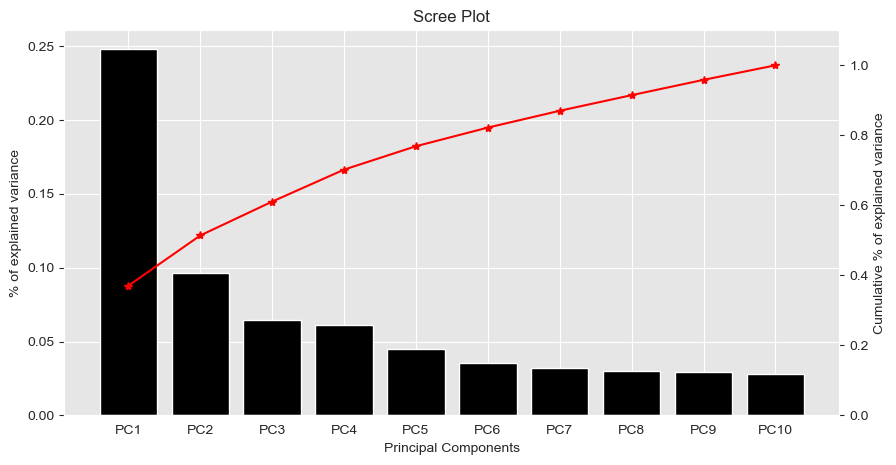

In [14]:
print('\n\nScree Plot to understand how much PCs will go in the final graph\n')

fig, ax = plt.subplots(figsize = (10, 5))

axt = ax.twinx()

# percentage of explained variance (lambda_k) / (lambda_1 + ... + lambda_d)
perc_var = np.real(PCA_from_scratch.explained_variance_ratio)
print(perc_var)

labels = ['PC' + str(j) for j in range(1, len(perc_var) + 1)]
ax.bar(labels, perc_var, color = 'black')


# cumulative percentage of explained variance (lambda_1 + lambda_k) / (lambda_1 + ... + lambda_d)
cum_var = np.cumsum(perc_var) / np.sum(perc_var)
axt.plot(labels, cum_var, color = 'red', marker = '*')

ax.set_xlabel('Principal Components')
ax.set_ylabel('% of explained variance')
axt.set_ylabel('Cumulative % of explained variance')
ax.set_title('Scree Plot')

axt.set_ylim([0, 1.1])
axt.grid(False)
plt.show()